Make sure that the parent directory is on our python path

In [ ]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

## Data Manipulation

Import methods

In [2]:
from Data.data_processing import load_data, to_daily, missing_values, data_normalization

Manipulate data

In [8]:
path = '../Data/Traffic_Incidents_Braga.csv'                # path to dataset
method = 'multivariate'                                     # method 
missing_method = 'masking'                                  # method to deal with missing data

df_raw = load_data(path)                                    # load dataset
df_multi = to_daily(method, df_raw)                         # convert data to univariate and group incidents by day
df_multi = missing_values(method, missing_method, df_multi) # deal with missing values

scaler = data_normalization(method, df_multi)               # scaling data to [-1, 1]

## Parameter Optimization

Import methods

In [9]:
from models import generate_configs, grid_search

Define parameter ranges to generate different configurations to evaluate the models

In [10]:
features = 4                  # multivariate

timesteps = [7, 6, 5]         # number of days that make up a sequence 
epochs = [50, 40, 30, 20, 15] # number of iterations
batch_size = [10, 7, 5, 2]    # number of sequences
filters = [16]
kernel_size = [5]
pool_size = [2]

Generate a list with all the possible configurations

In [11]:
configs = generate_configs(timesteps, epochs, batch_size, filters, kernel_size, pool_size)

Generated 60 different configurations


Grid search for the best configuration (sorted by performance)

Epoch 1/50
24/24 [==============================] - 1s 13ms/step - loss: 0.3769 - mae: 0.3364 - rmse: 0.3763 - val_loss: 0.3229 - val_mae: 0.2875 - val_rmse: 0.3441
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3000 - mae: 0.2672 - rmse: 0.2997 - val_loss: 0.2734 - val_mae: 0.2507 - val_rmse: 0.2856
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1862 - mae: 0.1496 - rmse: 0.1861 - val_loss: 0.2846 - val_mae: 0.2603 - val_rmse: 0.2937
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1692 - mae: 0.1354 - rmse: 0.1691 - val_loss: 0.2820 - val_mae: 0.2582 - val_rmse: 0.2902
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1582 - mae: 0.1232 - rmse: 0.1582 - val_loss: 0.2806 - val_mae: 0.2570 - val_rmse: 0.2893
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1571 - mae: 0.1254 - rmse: 0.1570 - val_loss: 0.2702 - val_mae: 0.2485 - val_rmse: 0.2792
Epoch 7/50
24/2

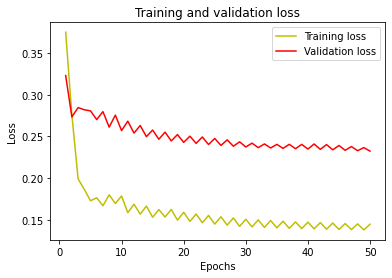

Configuration: timesteps=7, epochs=50, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.31691399216651917
mae: 0.2501322329044342
rmse: 0.3318908214569092
Epoch 1/50
34/34 [==============================] - 1s 8ms/step - loss: 0.3382 - mae: 0.2959 - rmse: 0.3379 - val_loss: 0.2772 - val_mae: 0.2181 - val_rmse: 0.2777
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 0.1843 - mae: 0.1458 - rmse: 0.1842 - val_loss: 0.2534 - val_mae: 0.2218 - val_rmse: 0.2571
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.1764 - mae: 0.1472 - rmse: 0.1764 - val_loss: 0.2451 - val_mae: 0.2126 - val_rmse: 0.2491
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.1598 - mae: 0.1300 - rmse: 0.1597 - val_loss: 0.2434 - val_mae: 0.2179 - val_rmse: 0.2475
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 0.1557 - mae: 0.1275 - rmse: 0.1556 - val_loss: 0.2391 - val_mae: 0.2009 - val_rmse: 0.2430
Epoch 6/50
3

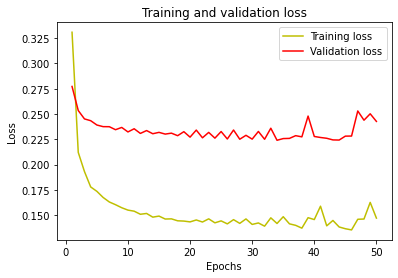

Configuration: timesteps=7, epochs=50, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.33272629976272583
mae: 0.28420519828796387
rmse: 0.3489551842212677
Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 0.5455 - mae: 0.5259 - rmse: 0.5453 - val_loss: 0.3084 - val_mae: 0.2768 - val_rmse: 0.3084
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.2015 - mae: 0.1718 - rmse: 0.2014 - val_loss: 0.2758 - val_mae: 0.2549 - val_rmse: 0.2758
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.1573 - mae: 0.1301 - rmse: 0.1573 - val_loss: 0.2687 - val_mae: 0.2502 - val_rmse: 0.2687
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1469 - mae: 0.1202 - rmse: 0.1469 - val_loss: 0.2541 - val_mae: 0.2380 - val_rmse: 0.2541
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1447 - mae: 0.1188 - rmse: 0.1447 - val_loss: 0.2608 - val_mae: 0.2447 - val_rmse: 0.2608
Epoch 6/50
4

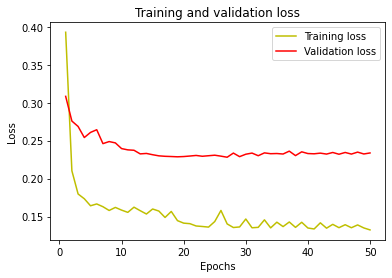

Configuration: timesteps=7, epochs=50, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.30888447165489197
mae: 0.23319536447525024
rmse: 0.32412564754486084
Epoch 1/50
116/116 [==============================] - 1s 3ms/step - loss: 0.1957 - mae: 0.1688 - rmse: 0.1957 - val_loss: 0.2957 - val_mae: 0.2714 - val_rmse: 0.2973
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1513 - mae: 0.1279 - rmse: 0.1513 - val_loss: 0.3501 - val_mae: 0.3055 - val_rmse: 0.3518
Epoch 3/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1416 - mae: 0.1189 - rmse: 0.1416 - val_loss: 0.3325 - val_mae: 0.2949 - val_rmse: 0.3348
Epoch 4/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1423 - mae: 0.1193 - rmse: 0.1423 - val_loss: 0.3268 - val_mae: 0.2911 - val_rmse: 0.3292
Epoch 5/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1427 - mae: 0.1201 - rmse: 0.1427 - val_loss: 0.3119 - val_mae: 0.2821 - val_rmse: 0.3145
E

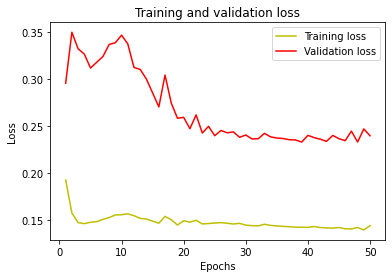

Configuration: timesteps=7, epochs=50, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.33002081513404846
mae: 0.2665904462337494
rmse: 0.34763088822364807
Epoch 1/40
24/24 [==============================] - 1s 11ms/step - loss: 0.5974 - mae: 0.5761 - rmse: 0.5967 - val_loss: 0.3941 - val_mae: 0.3386 - val_rmse: 0.4111
Epoch 2/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3083 - mae: 0.2791 - rmse: 0.3081 - val_loss: 0.2445 - val_mae: 0.2155 - val_rmse: 0.2575
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.1591 - mae: 0.1298 - rmse: 0.1590 - val_loss: 0.2690 - val_mae: 0.2465 - val_rmse: 0.2824
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.1684 - mae: 0.1419 - rmse: 0.1684 - val_loss: 0.2582 - val_mae: 0.2391 - val_rmse: 0.2693
Epoch 5/40
24/24 [==============================] - 0s 4ms/step - loss: 0.1474 - mae: 0.1216 - rmse: 0.1474 - val_loss: 0.2434 - val_mae: 0.2230 - val_rmse: 0.2528
Epoch 6/40


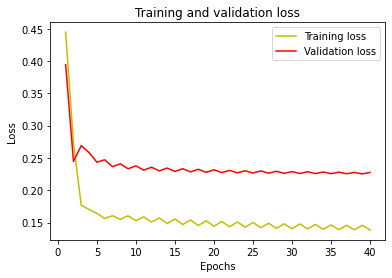

Configuration: timesteps=7, epochs=40, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.31435635685920715
mae: 0.2625384032726288
rmse: 0.32913413643836975
Epoch 1/40
34/34 [==============================] - 1s 8ms/step - loss: 0.6170 - mae: 0.5963 - rmse: 0.6167 - val_loss: 0.4489 - val_mae: 0.3917 - val_rmse: 0.4688
Epoch 2/40
34/34 [==============================] - 0s 3ms/step - loss: 0.3407 - mae: 0.3167 - rmse: 0.3406 - val_loss: 0.2602 - val_mae: 0.2355 - val_rmse: 0.2737
Epoch 3/40
34/34 [==============================] - 0s 3ms/step - loss: 0.1692 - mae: 0.1414 - rmse: 0.1692 - val_loss: 0.3080 - val_mae: 0.2786 - val_rmse: 0.3213
Epoch 4/40
34/34 [==============================] - 0s 3ms/step - loss: 0.1713 - mae: 0.1420 - rmse: 0.1712 - val_loss: 0.2693 - val_mae: 0.2468 - val_rmse: 0.2802
Epoch 5/40
34/34 [==============================] - 0s 3ms/step - loss: 0.1567 - mae: 0.1289 - rmse: 0.1566 - val_loss: 0.2710 - val_mae: 0.2485 - val_rmse: 0.2810
Epoch 6/40


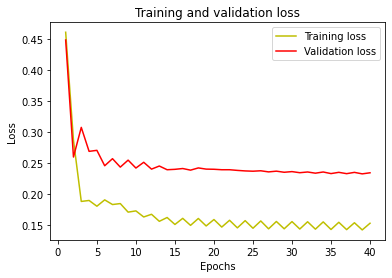

Configuration: timesteps=7, epochs=40, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3257797658443451
mae: 0.26067131757736206
rmse: 0.34188053011894226
Epoch 1/40
47/47 [==============================] - 1s 6ms/step - loss: 0.4463 - mae: 0.4182 - rmse: 0.4462 - val_loss: 0.3140 - val_mae: 0.2808 - val_rmse: 0.3140
Epoch 2/40
47/47 [==============================] - 0s 2ms/step - loss: 0.1850 - mae: 0.1528 - rmse: 0.1850 - val_loss: 0.2783 - val_mae: 0.2488 - val_rmse: 0.2783
Epoch 3/40
47/47 [==============================] - 0s 3ms/step - loss: 0.1913 - mae: 0.1615 - rmse: 0.1912 - val_loss: 0.2539 - val_mae: 0.2240 - val_rmse: 0.2539
Epoch 4/40
47/47 [==============================] - 0s 2ms/step - loss: 0.1596 - mae: 0.1277 - rmse: 0.1596 - val_loss: 0.2556 - val_mae: 0.2306 - val_rmse: 0.2556
Epoch 5/40
47/47 [==============================] - 0s 3ms/step - loss: 0.1460 - mae: 0.1163 - rmse: 0.1460 - val_loss: 0.2530 - val_mae: 0.2282 - val_rmse: 0.2530
Epoch 6/40
4

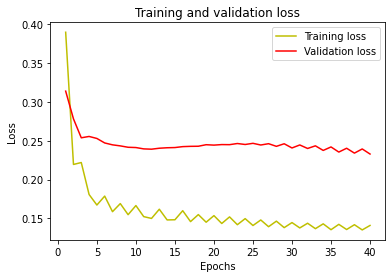

Configuration: timesteps=7, epochs=40, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.31405994296073914
mae: 0.24764057993888855
rmse: 0.328525573015213
Epoch 1/40
116/116 [==============================] - 1s 6ms/step - loss: 0.3624 - mae: 0.3365 - rmse: 0.3624 - val_loss: 0.4824 - val_mae: 0.4288 - val_rmse: 0.4908
Epoch 2/40
116/116 [==============================] - 0s 2ms/step - loss: 0.1782 - mae: 0.1506 - rmse: 0.1782 - val_loss: 0.4548 - val_mae: 0.4005 - val_rmse: 0.4614
Epoch 3/40
116/116 [==============================] - 0s 2ms/step - loss: 0.1730 - mae: 0.1476 - rmse: 0.1730 - val_loss: 0.4352 - val_mae: 0.3811 - val_rmse: 0.4404
Epoch 4/40
116/116 [==============================] - 0s 2ms/step - loss: 0.1670 - mae: 0.1423 - rmse: 0.1670 - val_loss: 0.4337 - val_mae: 0.3788 - val_rmse: 0.4387
Epoch 5/40
116/116 [==============================] - 0s 2ms/step - loss: 0.1629 - mae: 0.1393 - rmse: 0.1629 - val_loss: 0.4622 - val_mae: 0.4058 - val_rmse: 0.4666
Epo

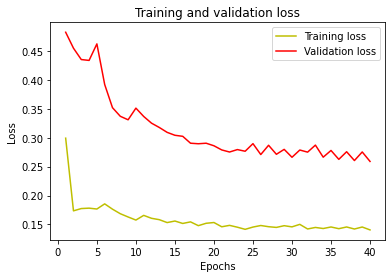

Configuration: timesteps=7, epochs=40, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.36297139525413513
mae: 0.29421818256378174
rmse: 0.38185182213783264
Epoch 1/30
24/24 [==============================] - 1s 11ms/step - loss: 0.8231 - mae: 0.7980 - rmse: 0.8223 - val_loss: 0.3497 - val_mae: 0.2920 - val_rmse: 0.3552
Epoch 2/30
24/24 [==============================] - 0s 3ms/step - loss: 0.2775 - mae: 0.2452 - rmse: 0.2773 - val_loss: 0.3035 - val_mae: 0.2528 - val_rmse: 0.3115
Epoch 3/30
24/24 [==============================] - 0s 3ms/step - loss: 0.1822 - mae: 0.1541 - rmse: 0.1821 - val_loss: 0.2647 - val_mae: 0.2267 - val_rmse: 0.2735
Epoch 4/30
24/24 [==============================] - 0s 4ms/step - loss: 0.1570 - mae: 0.1262 - rmse: 0.1570 - val_loss: 0.2534 - val_mae: 0.2212 - val_rmse: 0.2617
Epoch 5/30
24/24 [==============================] - 0s 3ms/step - loss: 0.1649 - mae: 0.1352 - rmse: 0.1649 - val_loss: 0.2403 - val_mae: 0.2104 - val_rmse: 0.2486
Epoch 6/30

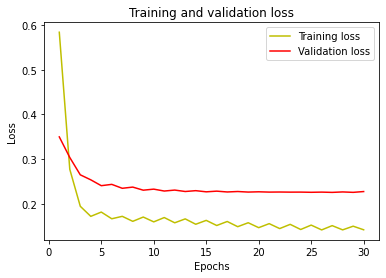

Configuration: timesteps=7, epochs=30, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3169226348400116
mae: 0.26731687784194946
rmse: 0.3313986659049988
Epoch 1/30
34/34 [==============================] - 1s 8ms/step - loss: 0.2507 - mae: 0.2208 - rmse: 0.2507 - val_loss: 0.2598 - val_mae: 0.2368 - val_rmse: 0.2676
Epoch 2/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1554 - mae: 0.1243 - rmse: 0.1554 - val_loss: 0.2533 - val_mae: 0.2329 - val_rmse: 0.2611
Epoch 3/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1573 - mae: 0.1293 - rmse: 0.1573 - val_loss: 0.2592 - val_mae: 0.2407 - val_rmse: 0.2668
Epoch 4/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1513 - mae: 0.1259 - rmse: 0.1513 - val_loss: 0.2461 - val_mae: 0.2276 - val_rmse: 0.2532
Epoch 5/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1564 - mae: 0.1287 - rmse: 0.1564 - val_loss: 0.2507 - val_mae: 0.2340 - val_rmse: 0.2577
Epoch 6/30
3

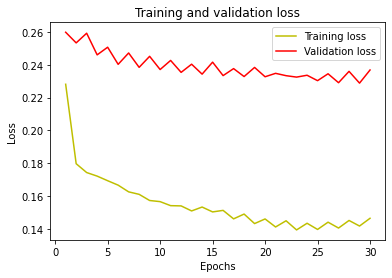

Configuration: timesteps=7, epochs=30, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3302115797996521
mae: 0.2716580927371979
rmse: 0.3459411859512329
Epoch 1/30
47/47 [==============================] - 1s 6ms/step - loss: 0.4865 - mae: 0.4643 - rmse: 0.4864 - val_loss: 0.2681 - val_mae: 0.2496 - val_rmse: 0.2681
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1626 - mae: 0.1344 - rmse: 0.1626 - val_loss: 0.2508 - val_mae: 0.2347 - val_rmse: 0.2508
Epoch 3/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1539 - mae: 0.1251 - rmse: 0.1538 - val_loss: 0.2458 - val_mae: 0.2296 - val_rmse: 0.2458
Epoch 4/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1468 - mae: 0.1189 - rmse: 0.1468 - val_loss: 0.2654 - val_mae: 0.2490 - val_rmse: 0.2654
Epoch 5/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1480 - mae: 0.1218 - rmse: 0.1480 - val_loss: 0.2818 - val_mae: 0.2623 - val_rmse: 0.2818
Epoch 6/30
47/

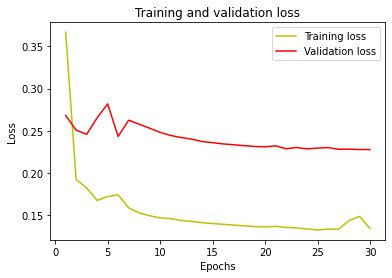

Configuration: timesteps=7, epochs=30, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3115231692790985
mae: 0.25146690011024475
rmse: 0.3272840976715088
Epoch 1/30
116/116 [==============================] - 1s 3ms/step - loss: 0.2640 - mae: 0.2377 - rmse: 0.2640 - val_loss: 0.2906 - val_mae: 0.2654 - val_rmse: 0.2907
Epoch 2/30
116/116 [==============================] - 0s 2ms/step - loss: 0.1614 - mae: 0.1365 - rmse: 0.1614 - val_loss: 0.3206 - val_mae: 0.2882 - val_rmse: 0.3204
Epoch 3/30
116/116 [==============================] - 0s 2ms/step - loss: 0.1486 - mae: 0.1235 - rmse: 0.1486 - val_loss: 0.3592 - val_mae: 0.3144 - val_rmse: 0.3587
Epoch 4/30
116/116 [==============================] - 0s 2ms/step - loss: 0.1557 - mae: 0.1318 - rmse: 0.1557 - val_loss: 0.3259 - val_mae: 0.2920 - val_rmse: 0.3261
Epoch 5/30
116/116 [==============================] - 0s 2ms/step - loss: 0.1502 - mae: 0.1263 - rmse: 0.1502 - val_loss: 0.3097 - val_mae: 0.2816 - val_rmse: 0.3102
Epo

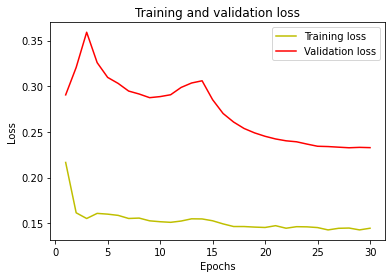

Configuration: timesteps=7, epochs=30, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.3349973261356354
mae: 0.27801111340522766
rmse: 0.35297083854675293
Epoch 1/20
24/24 [==============================] - 1s 11ms/step - loss: 1.0479 - mae: 1.0311 - rmse: 1.0467 - val_loss: 0.3394 - val_mae: 0.2597 - val_rmse: 0.3379
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: 0.2288 - mae: 0.1989 - rmse: 0.2287 - val_loss: 0.2699 - val_mae: 0.2396 - val_rmse: 0.2736
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.1884 - mae: 0.1577 - rmse: 0.1882 - val_loss: 0.2564 - val_mae: 0.2277 - val_rmse: 0.2609
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 0.1608 - mae: 0.1365 - rmse: 0.1608 - val_loss: 0.2579 - val_mae: 0.2302 - val_rmse: 0.2613
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.1432 - mae: 0.1139 - rmse: 0.1432 - val_loss: 0.2642 - val_mae: 0.2394 - val_rmse: 0.2684
Epoch 6/20


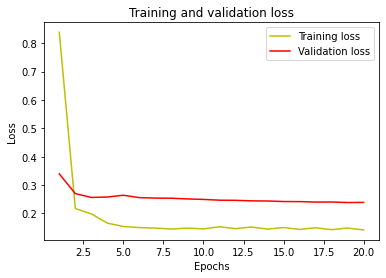

Configuration: timesteps=7, epochs=20, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.331202894449234
mae: 0.2758599519729614
rmse: 0.3476339280605316
Epoch 1/20
34/34 [==============================] - 1s 16ms/step - loss: 0.5744 - mae: 0.5409 - rmse: 0.5741 - val_loss: 0.3038 - val_mae: 0.2750 - val_rmse: 0.3136
Epoch 2/20
34/34 [==============================] - 0s 3ms/step - loss: 0.1905 - mae: 0.1569 - rmse: 0.1905 - val_loss: 0.2838 - val_mae: 0.2607 - val_rmse: 0.2932
Epoch 3/20
34/34 [==============================] - 0s 3ms/step - loss: 0.1686 - mae: 0.1386 - rmse: 0.1687 - val_loss: 0.2761 - val_mae: 0.2547 - val_rmse: 0.2849
Epoch 4/20
34/34 [==============================] - 0s 3ms/step - loss: 0.1583 - mae: 0.1305 - rmse: 0.1583 - val_loss: 0.2755 - val_mae: 0.2546 - val_rmse: 0.2840
Epoch 5/20
34/34 [==============================] - 0s 3ms/step - loss: 0.1486 - mae: 0.1206 - rmse: 0.1486 - val_loss: 0.2644 - val_mae: 0.2448 - val_rmse: 0.2720
Epoch 6/20
34

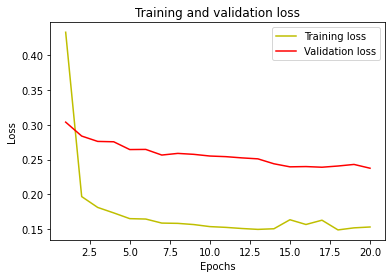

Configuration: timesteps=7, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.33040377497673035
mae: 0.26048386096954346
rmse: 0.34658941626548767
Epoch 1/20
47/47 [==============================] - 1s 6ms/step - loss: 0.3526 - mae: 0.3286 - rmse: 0.3525 - val_loss: 0.3242 - val_mae: 0.2836 - val_rmse: 0.3242
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1750 - mae: 0.1474 - rmse: 0.1750 - val_loss: 0.2542 - val_mae: 0.2307 - val_rmse: 0.2542
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 0.1663 - mae: 0.1365 - rmse: 0.1663 - val_loss: 0.2562 - val_mae: 0.2339 - val_rmse: 0.2562
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1453 - mae: 0.1178 - rmse: 0.1453 - val_loss: 0.2521 - val_mae: 0.2311 - val_rmse: 0.2521
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1393 - mae: 0.1125 - rmse: 0.1393 - val_loss: 0.2470 - val_mae: 0.2264 - val_rmse: 0.2470
Epoch 6/20


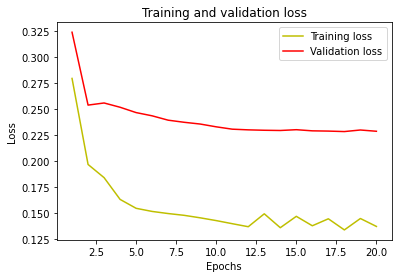

Configuration: timesteps=7, epochs=20, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3154160678386688
mae: 0.2412399798631668
rmse: 0.3323429822921753
Epoch 1/20
116/116 [==============================] - 1s 4ms/step - loss: 0.3808 - mae: 0.3540 - rmse: 0.3808 - val_loss: 0.4046 - val_mae: 0.3497 - val_rmse: 0.4069
Epoch 2/20
116/116 [==============================] - 0s 2ms/step - loss: 0.2170 - mae: 0.1882 - rmse: 0.2170 - val_loss: 0.3596 - val_mae: 0.3114 - val_rmse: 0.3616
Epoch 3/20
116/116 [==============================] - 0s 2ms/step - loss: 0.1714 - mae: 0.1460 - rmse: 0.1714 - val_loss: 0.3538 - val_mae: 0.3077 - val_rmse: 0.3557
Epoch 4/20
116/116 [==============================] - 0s 2ms/step - loss: 0.1579 - mae: 0.1337 - rmse: 0.1579 - val_loss: 0.3285 - val_mae: 0.2907 - val_rmse: 0.3307
Epoch 5/20
116/116 [==============================] - 0s 2ms/step - loss: 0.1424 - mae: 0.1190 - rmse: 0.1424 - val_loss: 0.3409 - val_mae: 0.3003 - val_rmse: 0.3428
Epoc

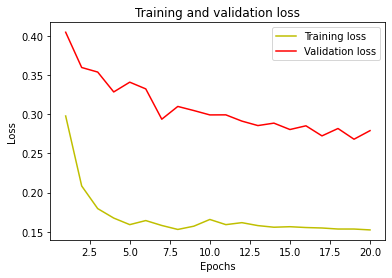

Configuration: timesteps=7, epochs=20, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.37254610657691956
mae: 0.30626049637794495
rmse: 0.3899470269680023
Epoch 1/15
24/24 [==============================] - 1s 11ms/step - loss: 0.6303 - mae: 0.6025 - rmse: 0.6293 - val_loss: 0.3979 - val_mae: 0.3434 - val_rmse: 0.4160
Epoch 2/15
24/24 [==============================] - 0s 3ms/step - loss: 0.4457 - mae: 0.4094 - rmse: 0.4451 - val_loss: 0.2585 - val_mae: 0.2377 - val_rmse: 0.2698
Epoch 3/15
24/24 [==============================] - 0s 3ms/step - loss: 0.2917 - mae: 0.2554 - rmse: 0.2913 - val_loss: 0.2762 - val_mae: 0.2541 - val_rmse: 0.2862
Epoch 4/15
24/24 [==============================] - 0s 4ms/step - loss: 0.2636 - mae: 0.2284 - rmse: 0.2632 - val_loss: 0.2695 - val_mae: 0.2497 - val_rmse: 0.2791
Epoch 5/15
24/24 [==============================] - 0s 3ms/step - loss: 0.2344 - mae: 0.2020 - rmse: 0.2341 - val_loss: 0.2672 - val_mae: 0.2485 - val_rmse: 0.2766
Epoch 6/15


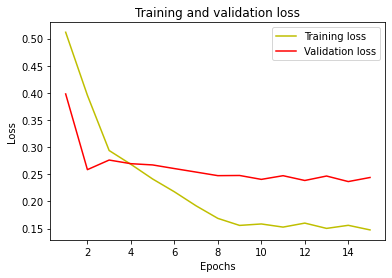

Configuration: timesteps=7, epochs=15, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.33271992206573486
mae: 0.27713677287101746
rmse: 0.34909144043922424
Epoch 1/15
34/34 [==============================] - 1s 8ms/step - loss: 0.7875 - mae: 0.7390 - rmse: 0.7867 - val_loss: 0.3585 - val_mae: 0.3086 - val_rmse: 0.3788
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.4007 - mae: 0.3565 - rmse: 0.4004 - val_loss: 0.3354 - val_mae: 0.2917 - val_rmse: 0.3515
Epoch 3/15
34/34 [==============================] - 0s 3ms/step - loss: 0.2191 - mae: 0.1847 - rmse: 0.2190 - val_loss: 0.2786 - val_mae: 0.2502 - val_rmse: 0.2910
Epoch 4/15
34/34 [==============================] - 0s 4ms/step - loss: 0.2049 - mae: 0.1734 - rmse: 0.2048 - val_loss: 0.2572 - val_mae: 0.2344 - val_rmse: 0.2673
Epoch 5/15
34/34 [==============================] - 0s 3ms/step - loss: 0.2038 - mae: 0.1734 - rmse: 0.2037 - val_loss: 0.2452 - val_mae: 0.2202 - val_rmse: 0.2545
Epoch 6/15

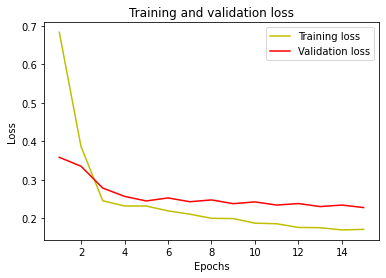

Configuration: timesteps=7, epochs=15, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.329852819442749
mae: 0.2691954970359802
rmse: 0.345583438873291
Epoch 1/15
47/47 [==============================] - 1s 6ms/step - loss: 0.4336 - mae: 0.3941 - rmse: 0.4335 - val_loss: 0.2512 - val_mae: 0.2208 - val_rmse: 0.2512
Epoch 2/15
47/47 [==============================] - 0s 2ms/step - loss: 0.1978 - mae: 0.1716 - rmse: 0.1977 - val_loss: 0.3158 - val_mae: 0.2802 - val_rmse: 0.3158
Epoch 3/15
47/47 [==============================] - 0s 2ms/step - loss: 0.1901 - mae: 0.1613 - rmse: 0.1900 - val_loss: 0.2633 - val_mae: 0.2442 - val_rmse: 0.2633
Epoch 4/15
47/47 [==============================] - 0s 2ms/step - loss: 0.1618 - mae: 0.1346 - rmse: 0.1617 - val_loss: 0.2638 - val_mae: 0.2461 - val_rmse: 0.2638
Epoch 5/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1704 - mae: 0.1433 - rmse: 0.1703 - val_loss: 0.2734 - val_mae: 0.2546 - val_rmse: 0.2734
Epoch 6/15
47/47

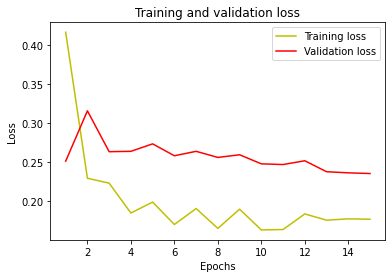

Configuration: timesteps=7, epochs=15, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3239644765853882
mae: 0.2579681873321533
rmse: 0.3406049907207489
Epoch 1/15
116/116 [==============================] - 1s 5ms/step - loss: 0.2020 - mae: 0.1799 - rmse: 0.2020 - val_loss: 0.3984 - val_mae: 0.3503 - val_rmse: 0.3984
Epoch 2/15
116/116 [==============================] - 0s 2ms/step - loss: 0.2888 - mae: 0.2666 - rmse: 0.2888 - val_loss: 0.3994 - val_mae: 0.3502 - val_rmse: 0.3998
Epoch 3/15
116/116 [==============================] - 0s 2ms/step - loss: 0.2134 - mae: 0.1880 - rmse: 0.2134 - val_loss: 0.3819 - val_mae: 0.3355 - val_rmse: 0.3820
Epoch 4/15
116/116 [==============================] - 0s 2ms/step - loss: 0.1818 - mae: 0.1581 - rmse: 0.1818 - val_loss: 0.3482 - val_mae: 0.3086 - val_rmse: 0.3487
Epoch 5/15
116/116 [==============================] - 0s 2ms/step - loss: 0.1646 - mae: 0.1424 - rmse: 0.1646 - val_loss: 0.3246 - val_mae: 0.2918 - val_rmse: 0.3257
Epoc

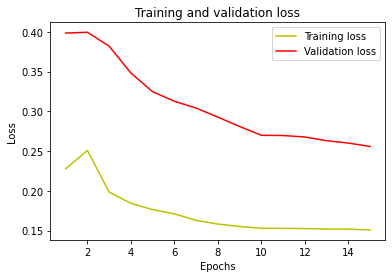

Configuration: timesteps=7, epochs=15, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.3668530285358429
mae: 0.31079185009002686
rmse: 0.3846304416656494
Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 0.3511 - mae: 0.3210 - rmse: 0.3506 - val_loss: 0.2962 - val_mae: 0.2664 - val_rmse: 0.3147
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2209 - mae: 0.1908 - rmse: 0.2207 - val_loss: 0.2748 - val_mae: 0.2493 - val_rmse: 0.2904
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1599 - mae: 0.1290 - rmse: 0.1597 - val_loss: 0.2752 - val_mae: 0.2502 - val_rmse: 0.2895
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1536 - mae: 0.1220 - rmse: 0.1534 - val_loss: 0.2734 - val_mae: 0.2491 - val_rmse: 0.2867
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1518 - mae: 0.1211 - rmse: 0.1517 - val_loss: 0.2675 - val_mae: 0.2442 - val_rmse: 0.2799
Epoch 6/50
2

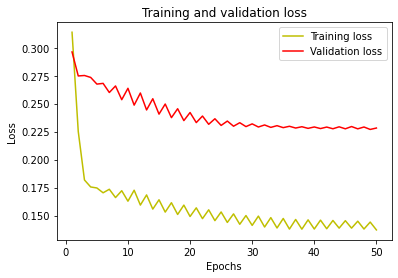

Configuration: timesteps=6, epochs=50, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.31207677721977234
mae: 0.2591298222541809
rmse: 0.32435914874076843
Epoch 1/50
34/34 [==============================] - 1s 8ms/step - loss: 0.7062 - mae: 0.6763 - rmse: 0.7057 - val_loss: 0.2314 - val_mae: 0.1919 - val_rmse: 0.2371
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 0.2238 - mae: 0.1874 - rmse: 0.2237 - val_loss: 0.2613 - val_mae: 0.2438 - val_rmse: 0.2716
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2188 - mae: 0.1842 - rmse: 0.2187 - val_loss: 0.2609 - val_mae: 0.2433 - val_rmse: 0.2686
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.1911 - mae: 0.1553 - rmse: 0.1910 - val_loss: 0.2729 - val_mae: 0.2529 - val_rmse: 0.2795
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 0.1845 - mae: 0.1525 - rmse: 0.1844 - val_loss: 0.2511 - val_mae: 0.2333 - val_rmse: 0.2563
Epoch 6/50


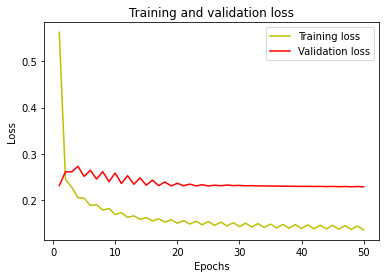

Configuration: timesteps=6, epochs=50, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3135765790939331
mae: 0.2592836916446686
rmse: 0.32582664489746094
Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 0.3901 - mae: 0.3591 - rmse: 0.3900 - val_loss: 0.2737 - val_mae: 0.2541 - val_rmse: 0.2737
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.2029 - mae: 0.1759 - rmse: 0.2029 - val_loss: 0.2464 - val_mae: 0.2302 - val_rmse: 0.2464
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.1791 - mae: 0.1507 - rmse: 0.1791 - val_loss: 0.2652 - val_mae: 0.2479 - val_rmse: 0.2652
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.1658 - mae: 0.1382 - rmse: 0.1658 - val_loss: 0.2370 - val_mae: 0.2181 - val_rmse: 0.2370
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1725 - mae: 0.1445 - rmse: 0.1725 - val_loss: 0.2525 - val_mae: 0.2358 - val_rmse: 0.2525
Epoch 6/50
47

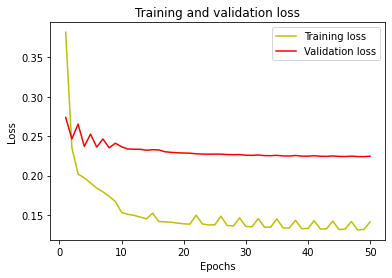

Configuration: timesteps=6, epochs=50, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.31076496839523315
mae: 0.24538055062294006
rmse: 0.3250572681427002
Epoch 1/50
116/116 [==============================] - 1s 3ms/step - loss: 0.2288 - mae: 0.2039 - rmse: 0.2288 - val_loss: 0.2562 - val_mae: 0.2341 - val_rmse: 0.2590
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1646 - mae: 0.1402 - rmse: 0.1646 - val_loss: 0.2727 - val_mae: 0.2525 - val_rmse: 0.2760
Epoch 3/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1494 - mae: 0.1252 - rmse: 0.1494 - val_loss: 0.2820 - val_mae: 0.2612 - val_rmse: 0.2855
Epoch 4/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1415 - mae: 0.1177 - rmse: 0.1415 - val_loss: 0.2896 - val_mae: 0.2672 - val_rmse: 0.2932
Epoch 5/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1438 - mae: 0.1203 - rmse: 0.1438 - val_loss: 0.2981 - val_mae: 0.2732 - val_rmse: 0.3019
Ep

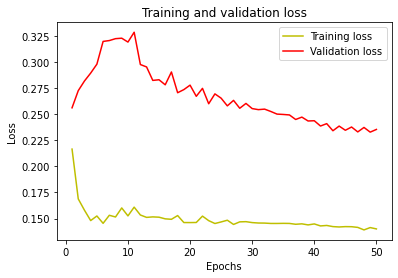

Configuration: timesteps=6, epochs=50, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.3268880248069763
mae: 0.2683560252189636
rmse: 0.3418739140033722
Epoch 1/40
24/24 [==============================] - 1s 11ms/step - loss: 0.2574 - mae: 0.2277 - rmse: 0.2573 - val_loss: 0.2572 - val_mae: 0.2246 - val_rmse: 0.2642
Epoch 2/40
24/24 [==============================] - 0s 3ms/step - loss: 0.1399 - mae: 0.1099 - rmse: 0.1399 - val_loss: 0.2669 - val_mae: 0.2405 - val_rmse: 0.2766
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.1434 - mae: 0.1189 - rmse: 0.1434 - val_loss: 0.2482 - val_mae: 0.2193 - val_rmse: 0.2553
Epoch 4/40
24/24 [==============================] - 0s 4ms/step - loss: 0.1399 - mae: 0.1107 - rmse: 0.1400 - val_loss: 0.2489 - val_mae: 0.2238 - val_rmse: 0.2567
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.1446 - mae: 0.1186 - rmse: 0.1446 - val_loss: 0.2472 - val_mae: 0.2232 - val_rmse: 0.2561
Epoch 6/40
24

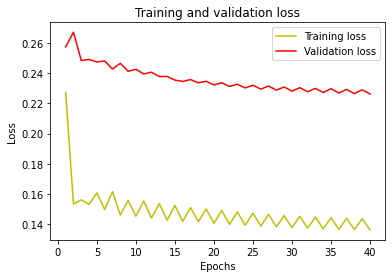

Configuration: timesteps=6, epochs=40, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3134760856628418
mae: 0.259982705116272
rmse: 0.3270634412765503
Epoch 1/40
34/34 [==============================] - 1s 16ms/step - loss: 0.5650 - mae: 0.5416 - rmse: 0.5646 - val_loss: 0.3513 - val_mae: 0.3083 - val_rmse: 0.3617
Epoch 2/40
34/34 [==============================] - 0s 3ms/step - loss: 0.3284 - mae: 0.3053 - rmse: 0.3282 - val_loss: 0.2430 - val_mae: 0.2272 - val_rmse: 0.2505
Epoch 3/40
34/34 [==============================] - 0s 3ms/step - loss: 0.1449 - mae: 0.1205 - rmse: 0.1448 - val_loss: 0.2359 - val_mae: 0.2136 - val_rmse: 0.2415
Epoch 4/40
34/34 [==============================] - 0s 2ms/step - loss: 0.1439 - mae: 0.1144 - rmse: 0.1438 - val_loss: 0.2377 - val_mae: 0.2171 - val_rmse: 0.2432
Epoch 5/40
34/34 [==============================] - 0s 3ms/step - loss: 0.1422 - mae: 0.1169 - rmse: 0.1421 - val_loss: 0.2318 - val_mae: 0.2013 - val_rmse: 0.2361
Epoch 6/40
34

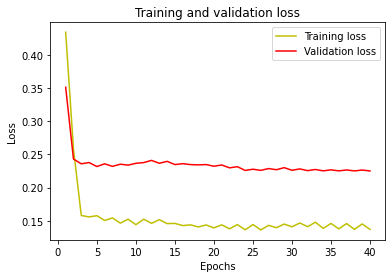

Configuration: timesteps=6, epochs=40, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.31138670444488525
mae: 0.257554292678833
rmse: 0.32340535521507263
Epoch 1/40
47/47 [==============================] - 1s 6ms/step - loss: 0.4244 - mae: 0.3980 - rmse: 0.4243 - val_loss: 0.2770 - val_mae: 0.2552 - val_rmse: 0.2770
Epoch 2/40
47/47 [==============================] - 0s 2ms/step - loss: 0.1733 - mae: 0.1469 - rmse: 0.1733 - val_loss: 0.3152 - val_mae: 0.2831 - val_rmse: 0.3152
Epoch 3/40
47/47 [==============================] - 0s 2ms/step - loss: 0.1678 - mae: 0.1412 - rmse: 0.1678 - val_loss: 0.2536 - val_mae: 0.2384 - val_rmse: 0.2536
Epoch 4/40
47/47 [==============================] - 0s 3ms/step - loss: 0.1565 - mae: 0.1291 - rmse: 0.1564 - val_loss: 0.2752 - val_mae: 0.2566 - val_rmse: 0.2752
Epoch 5/40
47/47 [==============================] - 0s 3ms/step - loss: 0.1558 - mae: 0.1294 - rmse: 0.1558 - val_loss: 0.2409 - val_mae: 0.2262 - val_rmse: 0.2409
Epoch 6/40
47

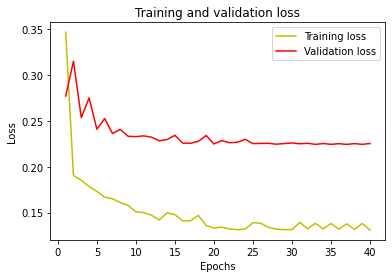

Configuration: timesteps=6, epochs=40, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3062964677810669
mae: 0.24252265691757202
rmse: 0.32020366191864014
Epoch 1/40
116/116 [==============================] - 1s 3ms/step - loss: 0.2366 - mae: 0.2136 - rmse: 0.2366 - val_loss: 0.4321 - val_mae: 0.3780 - val_rmse: 0.4346
Epoch 2/40
116/116 [==============================] - 0s 2ms/step - loss: 0.2084 - mae: 0.1833 - rmse: 0.2084 - val_loss: 0.3491 - val_mae: 0.3060 - val_rmse: 0.3512
Epoch 3/40
116/116 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.1313 - rmse: 0.1545 - val_loss: 0.3036 - val_mae: 0.2760 - val_rmse: 0.3060
Epoch 4/40
116/116 [==============================] - 0s 2ms/step - loss: 0.1421 - mae: 0.1191 - rmse: 0.1421 - val_loss: 0.3159 - val_mae: 0.2839 - val_rmse: 0.3183
Epoch 5/40
116/116 [==============================] - 0s 2ms/step - loss: 0.1448 - mae: 0.1223 - rmse: 0.1448 - val_loss: 0.3359 - val_mae: 0.2965 - val_rmse: 0.3377
Ep

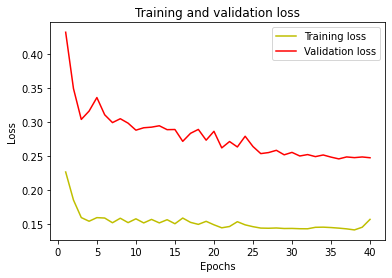

Configuration: timesteps=6, epochs=40, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.34088945388793945
mae: 0.2837035059928894
rmse: 0.35623422265052795
Epoch 1/30
24/24 [==============================] - 1s 11ms/step - loss: 0.2495 - mae: 0.2185 - rmse: 0.2491 - val_loss: 0.2427 - val_mae: 0.2275 - val_rmse: 0.2542
Epoch 2/30
24/24 [==============================] - 0s 4ms/step - loss: 0.1951 - mae: 0.1687 - rmse: 0.1949 - val_loss: 0.2413 - val_mae: 0.2263 - val_rmse: 0.2507
Epoch 3/30
24/24 [==============================] - 0s 3ms/step - loss: 0.1577 - mae: 0.1290 - rmse: 0.1576 - val_loss: 0.2295 - val_mae: 0.2087 - val_rmse: 0.2371
Epoch 4/30
24/24 [==============================] - 0s 4ms/step - loss: 0.1452 - mae: 0.1098 - rmse: 0.1451 - val_loss: 0.2253 - val_mae: 0.1956 - val_rmse: 0.2316
Epoch 5/30
24/24 [==============================] - 0s 4ms/step - loss: 0.1588 - mae: 0.1254 - rmse: 0.1587 - val_loss: 0.2250 - val_mae: 0.1914 - val_rmse: 0.2311
Epoch 6/30


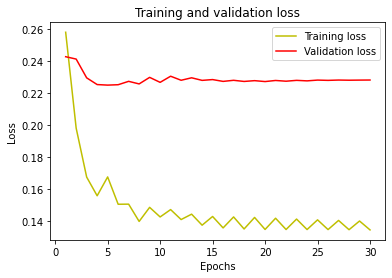

Configuration: timesteps=6, epochs=30, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3102283775806427
mae: 0.25549113750457764
rmse: 0.3231651186943054
Epoch 1/30
34/34 [==============================] - 1s 8ms/step - loss: 0.5341 - mae: 0.5146 - rmse: 0.5337 - val_loss: 0.3246 - val_mae: 0.2887 - val_rmse: 0.3321
Epoch 2/30
34/34 [==============================] - 0s 3ms/step - loss: 0.2151 - mae: 0.1867 - rmse: 0.2150 - val_loss: 0.2643 - val_mae: 0.2428 - val_rmse: 0.2697
Epoch 3/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1630 - mae: 0.1344 - rmse: 0.1629 - val_loss: 0.2674 - val_mae: 0.2463 - val_rmse: 0.2738
Epoch 4/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1656 - mae: 0.1393 - rmse: 0.1656 - val_loss: 0.2527 - val_mae: 0.2320 - val_rmse: 0.2589
Epoch 5/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1582 - mae: 0.1286 - rmse: 0.1581 - val_loss: 0.2690 - val_mae: 0.2471 - val_rmse: 0.2755
Epoch 6/30
3

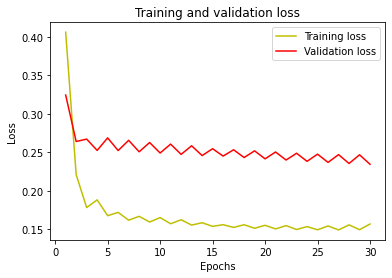

Configuration: timesteps=6, epochs=30, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3263073265552521
mae: 0.2654377222061157
rmse: 0.3394613265991211
Epoch 1/30
47/47 [==============================] - 1s 6ms/step - loss: 0.2263 - mae: 0.1928 - rmse: 0.2263 - val_loss: 0.2444 - val_mae: 0.2173 - val_rmse: 0.2444
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1661 - mae: 0.1400 - rmse: 0.1661 - val_loss: 0.2611 - val_mae: 0.2397 - val_rmse: 0.2611
Epoch 3/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1584 - mae: 0.1317 - rmse: 0.1584 - val_loss: 0.2549 - val_mae: 0.2347 - val_rmse: 0.2549
Epoch 4/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1450 - mae: 0.1191 - rmse: 0.1450 - val_loss: 0.2519 - val_mae: 0.2324 - val_rmse: 0.2519
Epoch 5/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1396 - mae: 0.1143 - rmse: 0.1396 - val_loss: 0.2729 - val_mae: 0.2519 - val_rmse: 0.2729
Epoch 6/30
47/

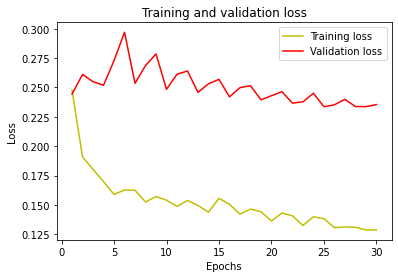

Configuration: timesteps=6, epochs=30, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3147452473640442
mae: 0.24683725833892822
rmse: 0.32852062582969666
Epoch 1/30
116/116 [==============================] - 1s 6ms/step - loss: 0.4273 - mae: 0.4079 - rmse: 0.4273 - val_loss: 0.3392 - val_mae: 0.2993 - val_rmse: 0.3449
Epoch 2/30
116/116 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.1316 - rmse: 0.1554 - val_loss: 0.3333 - val_mae: 0.2956 - val_rmse: 0.3385
Epoch 3/30
116/116 [==============================] - 0s 2ms/step - loss: 0.1624 - mae: 0.1393 - rmse: 0.1624 - val_loss: 0.3465 - val_mae: 0.3038 - val_rmse: 0.3515
Epoch 4/30
116/116 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.1326 - rmse: 0.1545 - val_loss: 0.3428 - val_mae: 0.3015 - val_rmse: 0.3474
Epoch 5/30
116/116 [==============================] - 0s 2ms/step - loss: 0.1542 - mae: 0.1324 - rmse: 0.1542 - val_loss: 0.3338 - val_mae: 0.2958 - val_rmse: 0.3380
Ep

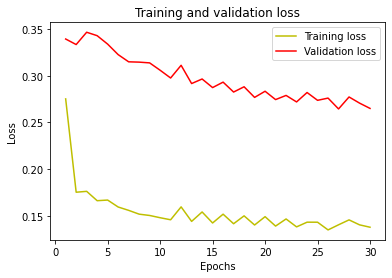

Configuration: timesteps=6, epochs=30, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.35772401094436646
mae: 0.27755212783813477
rmse: 0.3736928701400757
Epoch 1/20
24/24 [==============================] - 1s 10ms/step - loss: 0.6258 - mae: 0.5946 - rmse: 0.6248 - val_loss: 0.3248 - val_mae: 0.2893 - val_rmse: 0.3359
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 0.2975 - mae: 0.2617 - rmse: 0.2971 - val_loss: 0.2693 - val_mae: 0.2516 - val_rmse: 0.2791
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.1819 - mae: 0.1487 - rmse: 0.1817 - val_loss: 0.2623 - val_mae: 0.2466 - val_rmse: 0.2717
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.1676 - mae: 0.1377 - rmse: 0.1675 - val_loss: 0.2650 - val_mae: 0.2492 - val_rmse: 0.2745
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.1585 - mae: 0.1276 - rmse: 0.1584 - val_loss: 0.2528 - val_mae: 0.2387 - val_rmse: 0.2618
Epoch 6/20


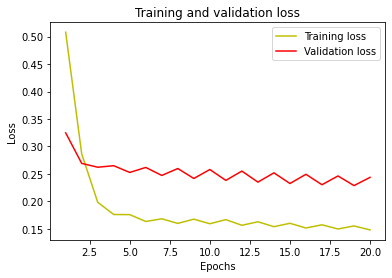

Configuration: timesteps=6, epochs=20, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3363533914089203
mae: 0.27842387557029724
rmse: 0.35017552971839905
Epoch 1/20
34/34 [==============================] - 1s 8ms/step - loss: 0.2744 - mae: 0.2390 - rmse: 0.2743 - val_loss: 0.2841 - val_mae: 0.2518 - val_rmse: 0.2959
Epoch 2/20
34/34 [==============================] - 0s 3ms/step - loss: 0.3599 - mae: 0.3337 - rmse: 0.3597 - val_loss: 0.2610 - val_mae: 0.2374 - val_rmse: 0.2698
Epoch 3/20
34/34 [==============================] - 0s 3ms/step - loss: 0.2325 - mae: 0.2017 - rmse: 0.2325 - val_loss: 0.2655 - val_mae: 0.2458 - val_rmse: 0.2727
Epoch 4/20
34/34 [==============================] - 0s 4ms/step - loss: 0.1730 - mae: 0.1423 - rmse: 0.1730 - val_loss: 0.2385 - val_mae: 0.2205 - val_rmse: 0.2440
Epoch 5/20
34/34 [==============================] - 0s 3ms/step - loss: 0.1376 - mae: 0.1117 - rmse: 0.1376 - val_loss: 0.2384 - val_mae: 0.2209 - val_rmse: 0.2439
Epoch 6/20


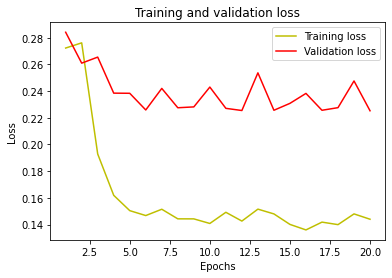

Configuration: timesteps=6, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.30738258361816406
mae: 0.2548287510871887
rmse: 0.3199090361595154
Epoch 1/20
47/47 [==============================] - 1s 6ms/step - loss: 0.4516 - mae: 0.4164 - rmse: 0.4515 - val_loss: 0.2606 - val_mae: 0.2443 - val_rmse: 0.2606
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 0.2842 - mae: 0.2587 - rmse: 0.2841 - val_loss: 0.2527 - val_mae: 0.2377 - val_rmse: 0.2527
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 0.1640 - mae: 0.1386 - rmse: 0.1640 - val_loss: 0.2417 - val_mae: 0.2266 - val_rmse: 0.2417
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 0.1386 - mae: 0.1128 - rmse: 0.1386 - val_loss: 0.2372 - val_mae: 0.2214 - val_rmse: 0.2372
Epoch 5/20
47/47 [==============================] - 0s 3ms/step - loss: 0.1402 - mae: 0.1148 - rmse: 0.1402 - val_loss: 0.2395 - val_mae: 0.2246 - val_rmse: 0.2395
Epoch 6/20
47

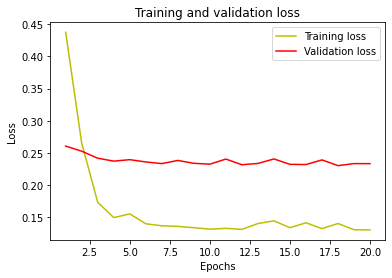

Configuration: timesteps=6, epochs=20, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.30841511487960815
mae: 0.24945476651191711
rmse: 0.3213871717453003
Epoch 1/20
116/116 [==============================] - 1s 3ms/step - loss: 0.5778 - mae: 0.5617 - rmse: 0.5778 - val_loss: 0.3518 - val_mae: 0.3079 - val_rmse: 0.3550
Epoch 2/20
116/116 [==============================] - 0s 2ms/step - loss: 0.1634 - mae: 0.1397 - rmse: 0.1634 - val_loss: 0.3242 - val_mae: 0.2895 - val_rmse: 0.3270
Epoch 3/20
116/116 [==============================] - 0s 2ms/step - loss: 0.1440 - mae: 0.1229 - rmse: 0.1440 - val_loss: 0.3098 - val_mae: 0.2801 - val_rmse: 0.3126
Epoch 4/20
116/116 [==============================] - 0s 2ms/step - loss: 0.1425 - mae: 0.1216 - rmse: 0.1425 - val_loss: 0.3102 - val_mae: 0.2806 - val_rmse: 0.3130
Epoch 5/20
116/116 [==============================] - 0s 2ms/step - loss: 0.1392 - mae: 0.1186 - rmse: 0.1392 - val_loss: 0.3006 - val_mae: 0.2747 - val_rmse: 0.3033
Ep

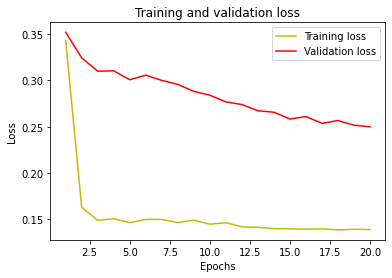

Configuration: timesteps=6, epochs=20, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.3452324867248535
mae: 0.28587856888771057
rmse: 0.36024972796440125
Epoch 1/15
24/24 [==============================] - 1s 10ms/step - loss: 1.0620 - mae: 1.0502 - rmse: 1.0612 - val_loss: 0.3977 - val_mae: 0.3241 - val_rmse: 0.3869
Epoch 2/15
24/24 [==============================] - 0s 4ms/step - loss: 0.3457 - mae: 0.3215 - rmse: 0.3454 - val_loss: 0.3044 - val_mae: 0.2688 - val_rmse: 0.3180
Epoch 3/15
24/24 [==============================] - 0s 3ms/step - loss: 0.1599 - mae: 0.1344 - rmse: 0.1599 - val_loss: 0.2617 - val_mae: 0.2374 - val_rmse: 0.2730
Epoch 4/15
24/24 [==============================] - 0s 4ms/step - loss: 0.1482 - mae: 0.1224 - rmse: 0.1481 - val_loss: 0.2569 - val_mae: 0.2336 - val_rmse: 0.2665
Epoch 5/15
24/24 [==============================] - 0s 3ms/step - loss: 0.1496 - mae: 0.1213 - rmse: 0.1495 - val_loss: 0.2489 - val_mae: 0.2264 - val_rmse: 0.2584
Epoch 6/15


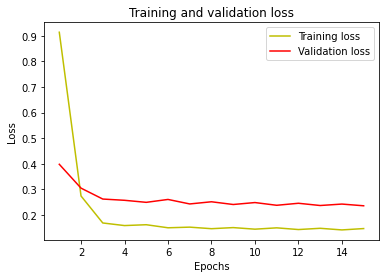

Configuration: timesteps=6, epochs=15, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3210737109184265
mae: 0.2535609006881714
rmse: 0.33465108275413513
Epoch 1/15
34/34 [==============================] - 1s 9ms/step - loss: 0.3101 - mae: 0.2778 - rmse: 0.3098 - val_loss: 0.2622 - val_mae: 0.2339 - val_rmse: 0.2725
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.2301 - mae: 0.1993 - rmse: 0.2299 - val_loss: 0.2625 - val_mae: 0.2364 - val_rmse: 0.2735
Epoch 3/15
34/34 [==============================] - 0s 3ms/step - loss: 0.1527 - mae: 0.1190 - rmse: 0.1527 - val_loss: 0.2597 - val_mae: 0.2353 - val_rmse: 0.2705
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.1464 - mae: 0.1163 - rmse: 0.1464 - val_loss: 0.2572 - val_mae: 0.2334 - val_rmse: 0.2673
Epoch 5/15
34/34 [==============================] - 0s 3ms/step - loss: 0.1431 - mae: 0.1137 - rmse: 0.1431 - val_loss: 0.2526 - val_mae: 0.2291 - val_rmse: 0.2621
Epoch 6/15
3

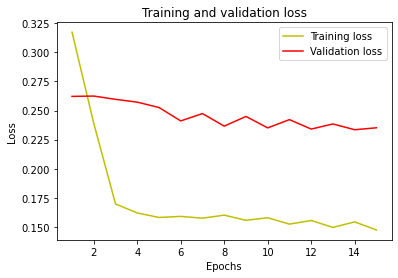

Configuration: timesteps=6, epochs=15, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.32693547010421753
mae: 0.2729777991771698
rmse: 0.3405948877334595
Epoch 1/15
47/47 [==============================] - 1s 6ms/step - loss: 0.4245 - mae: 0.3996 - rmse: 0.4244 - val_loss: 0.2645 - val_mae: 0.2430 - val_rmse: 0.2645
Epoch 2/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1519 - mae: 0.1254 - rmse: 0.1519 - val_loss: 0.2583 - val_mae: 0.2391 - val_rmse: 0.2583
Epoch 3/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1417 - mae: 0.1158 - rmse: 0.1417 - val_loss: 0.2503 - val_mae: 0.2320 - val_rmse: 0.2503
Epoch 4/15
47/47 [==============================] - 0s 4ms/step - loss: 0.1442 - mae: 0.1184 - rmse: 0.1442 - val_loss: 0.2451 - val_mae: 0.2276 - val_rmse: 0.2451
Epoch 5/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1429 - mae: 0.1172 - rmse: 0.1429 - val_loss: 0.2410 - val_mae: 0.2238 - val_rmse: 0.2410
Epoch 6/15
47

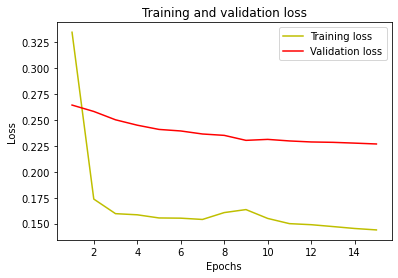

Configuration: timesteps=6, epochs=15, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.31904101371765137
mae: 0.24994340538978577
rmse: 0.33370983600616455
Epoch 1/15
116/116 [==============================] - 1s 4ms/step - loss: 0.2292 - mae: 0.2043 - rmse: 0.2292 - val_loss: 0.3071 - val_mae: 0.2782 - val_rmse: 0.3099
Epoch 2/15
116/116 [==============================] - 0s 2ms/step - loss: 0.1699 - mae: 0.1471 - rmse: 0.1699 - val_loss: 0.2927 - val_mae: 0.2689 - val_rmse: 0.2950
Epoch 3/15
116/116 [==============================] - 0s 2ms/step - loss: 0.1490 - mae: 0.1268 - rmse: 0.1490 - val_loss: 0.2925 - val_mae: 0.2692 - val_rmse: 0.2949
Epoch 4/15
116/116 [==============================] - 0s 2ms/step - loss: 0.1469 - mae: 0.1245 - rmse: 0.1469 - val_loss: 0.3013 - val_mae: 0.2752 - val_rmse: 0.3038
Epoch 5/15
116/116 [==============================] - 0s 2ms/step - loss: 0.1464 - mae: 0.1238 - rmse: 0.1464 - val_loss: 0.3073 - val_mae: 0.2791 - val_rmse: 0.3097
E

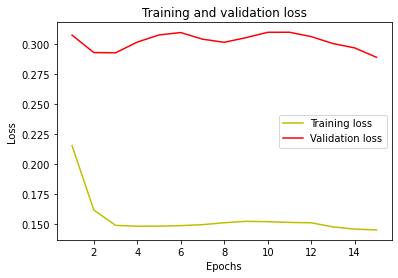

Configuration: timesteps=6, epochs=15, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.37730780243873596
mae: 0.3081296384334564
rmse: 0.392563134431839
Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 0.5974 - mae: 0.5762 - rmse: 0.5966 - val_loss: 0.2546 - val_mae: 0.2245 - val_rmse: 0.2644
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2096 - mae: 0.1814 - rmse: 0.2095 - val_loss: 0.2649 - val_mae: 0.2386 - val_rmse: 0.2743
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1502 - mae: 0.1237 - rmse: 0.1501 - val_loss: 0.2548 - val_mae: 0.2308 - val_rmse: 0.2623
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1415 - mae: 0.1165 - rmse: 0.1414 - val_loss: 0.2496 - val_mae: 0.2274 - val_rmse: 0.2568
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1477 - mae: 0.1211 - rmse: 0.1477 - val_loss: 0.2455 - val_mae: 0.2240 - val_rmse: 0.2526
Epoch 6/50
24

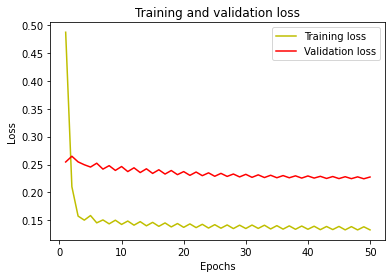

Configuration: timesteps=5, epochs=50, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3127019703388214
mae: 0.25998181104660034
rmse: 0.3260197937488556
Epoch 1/50
34/34 [==============================] - 1s 9ms/step - loss: 0.5357 - mae: 0.5159 - rmse: 0.5355 - val_loss: 0.3539 - val_mae: 0.3100 - val_rmse: 0.3622
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 0.1817 - mae: 0.1488 - rmse: 0.1816 - val_loss: 0.2555 - val_mae: 0.2419 - val_rmse: 0.2628
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.1551 - mae: 0.1247 - rmse: 0.1550 - val_loss: 0.2494 - val_mae: 0.2364 - val_rmse: 0.2562
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: 0.1493 - mae: 0.1217 - rmse: 0.1492 - val_loss: 0.2566 - val_mae: 0.2427 - val_rmse: 0.2632
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 0.1463 - mae: 0.1202 - rmse: 0.1462 - val_loss: 0.2435 - val_mae: 0.2304 - val_rmse: 0.2497
Epoch 6/50
3

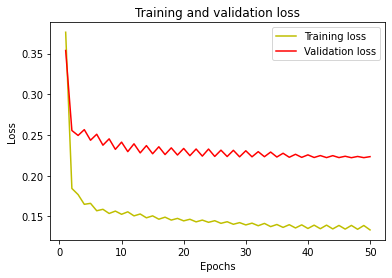

Configuration: timesteps=5, epochs=50, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.30406296253204346
mae: 0.2545557916164398
rmse: 0.31580159068107605
Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 0.2971 - mae: 0.2658 - rmse: 0.2970 - val_loss: 0.2667 - val_mae: 0.2484 - val_rmse: 0.2667
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1702 - mae: 0.1414 - rmse: 0.1701 - val_loss: 0.3004 - val_mae: 0.2749 - val_rmse: 0.3004
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1596 - mae: 0.1319 - rmse: 0.1596 - val_loss: 0.2600 - val_mae: 0.2436 - val_rmse: 0.2600
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1591 - mae: 0.1305 - rmse: 0.1591 - val_loss: 0.2564 - val_mae: 0.2398 - val_rmse: 0.2564
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.1558 - mae: 0.1288 - rmse: 0.1558 - val_loss: 0.2556 - val_mae: 0.2386 - val_rmse: 0.2556
Epoch 6/50
4

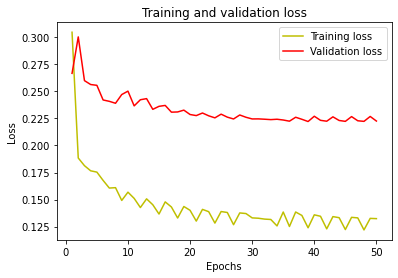

Configuration: timesteps=5, epochs=50, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3033086657524109
mae: 0.23963665962219238
rmse: 0.3162713348865509
Epoch 1/50
117/117 [==============================] - 1s 6ms/step - loss: 0.4035 - mae: 0.3824 - rmse: 0.4035 - val_loss: 0.3894 - val_mae: 0.3399 - val_rmse: 0.3932
Epoch 2/50
117/117 [==============================] - 0s 2ms/step - loss: 0.1950 - mae: 0.1703 - rmse: 0.1950 - val_loss: 0.3561 - val_mae: 0.3137 - val_rmse: 0.3593
Epoch 3/50
117/117 [==============================] - 0s 2ms/step - loss: 0.1609 - mae: 0.1380 - rmse: 0.1610 - val_loss: 0.2745 - val_mae: 0.2559 - val_rmse: 0.2774
Epoch 4/50
117/117 [==============================] - 0s 2ms/step - loss: 0.1361 - mae: 0.1155 - rmse: 0.1361 - val_loss: 0.2769 - val_mae: 0.2579 - val_rmse: 0.2796
Epoch 5/50
117/117 [==============================] - 0s 2ms/step - loss: 0.1402 - mae: 0.1205 - rmse: 0.1402 - val_loss: 0.2808 - val_mae: 0.2604 - val_rmse: 0.2834
Epo

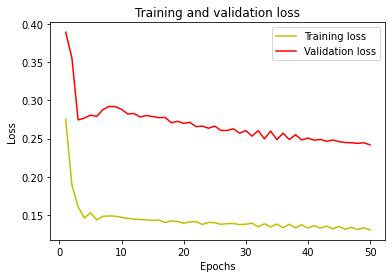

Configuration: timesteps=5, epochs=50, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.3238876163959503
mae: 0.26710283756256104
rmse: 0.33745086193084717
Epoch 1/40
24/24 [==============================] - 1s 11ms/step - loss: 0.3323 - mae: 0.2992 - rmse: 0.3319 - val_loss: 0.2877 - val_mae: 0.2639 - val_rmse: 0.2993
Epoch 2/40
24/24 [==============================] - 0s 4ms/step - loss: 0.2025 - mae: 0.1784 - rmse: 0.2023 - val_loss: 0.2666 - val_mae: 0.2472 - val_rmse: 0.2782
Epoch 3/40
24/24 [==============================] - 0s 4ms/step - loss: 0.1583 - mae: 0.1334 - rmse: 0.1582 - val_loss: 0.2553 - val_mae: 0.2352 - val_rmse: 0.2654
Epoch 4/40
24/24 [==============================] - 0s 4ms/step - loss: 0.1415 - mae: 0.1153 - rmse: 0.1415 - val_loss: 0.2567 - val_mae: 0.2365 - val_rmse: 0.2656
Epoch 5/40
24/24 [==============================] - 0s 4ms/step - loss: 0.1400 - mae: 0.1128 - rmse: 0.1399 - val_loss: 0.2460 - val_mae: 0.2255 - val_rmse: 0.2546
Epoch 6/40


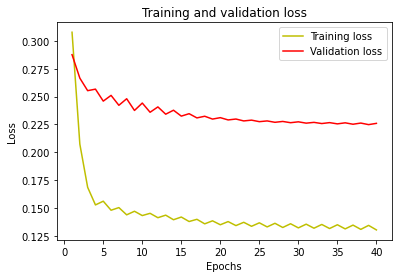

Configuration: timesteps=5, epochs=40, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3055567741394043
mae: 0.2513435184955597
rmse: 0.3181634843349457
Epoch 1/40
34/34 [==============================] - 1s 8ms/step - loss: 0.4458 - mae: 0.4270 - rmse: 0.4455 - val_loss: 0.3400 - val_mae: 0.3014 - val_rmse: 0.3499
Epoch 2/40
34/34 [==============================] - 0s 3ms/step - loss: 0.1950 - mae: 0.1619 - rmse: 0.1949 - val_loss: 0.2676 - val_mae: 0.2511 - val_rmse: 0.2763
Epoch 3/40
34/34 [==============================] - 0s 4ms/step - loss: 0.1617 - mae: 0.1308 - rmse: 0.1617 - val_loss: 0.2716 - val_mae: 0.2541 - val_rmse: 0.2800
Epoch 4/40
34/34 [==============================] - 0s 3ms/step - loss: 0.1559 - mae: 0.1239 - rmse: 0.1559 - val_loss: 0.2642 - val_mae: 0.2479 - val_rmse: 0.2721
Epoch 5/40
34/34 [==============================] - 0s 4ms/step - loss: 0.1522 - mae: 0.1238 - rmse: 0.1521 - val_loss: 0.2641 - val_mae: 0.2476 - val_rmse: 0.2717
Epoch 6/40
34

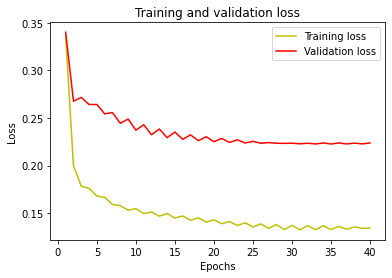

Configuration: timesteps=5, epochs=40, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3054543733596802
mae: 0.24661698937416077
rmse: 0.3184586465358734
Epoch 1/40
47/47 [==============================] - 1s 6ms/step - loss: 0.4635 - mae: 0.4437 - rmse: 0.4634 - val_loss: 0.3178 - val_mae: 0.2881 - val_rmse: 0.3178
Epoch 2/40
47/47 [==============================] - 0s 3ms/step - loss: 0.2131 - mae: 0.1871 - rmse: 0.2130 - val_loss: 0.2723 - val_mae: 0.2541 - val_rmse: 0.2723
Epoch 3/40
47/47 [==============================] - 0s 3ms/step - loss: 0.1538 - mae: 0.1293 - rmse: 0.1538 - val_loss: 0.2633 - val_mae: 0.2443 - val_rmse: 0.2633
Epoch 4/40
47/47 [==============================] - 0s 3ms/step - loss: 0.1347 - mae: 0.1095 - rmse: 0.1346 - val_loss: 0.2493 - val_mae: 0.2292 - val_rmse: 0.2493
Epoch 5/40
47/47 [==============================] - 0s 3ms/step - loss: 0.1344 - mae: 0.1093 - rmse: 0.1344 - val_loss: 0.2454 - val_mae: 0.2241 - val_rmse: 0.2454
Epoch 6/40
47

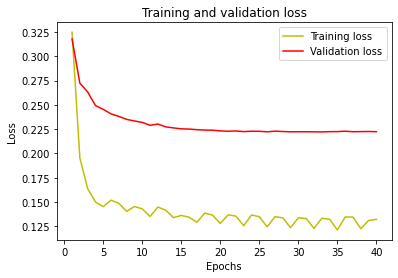

Configuration: timesteps=5, epochs=40, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.30059704184532166
mae: 0.23860512673854828
rmse: 0.3128509819507599
Epoch 1/40
117/117 [==============================] - 1s 4ms/step - loss: 0.4239 - mae: 0.4013 - rmse: 0.4238 - val_loss: 0.3155 - val_mae: 0.2877 - val_rmse: 0.3208
Epoch 2/40
117/117 [==============================] - 0s 2ms/step - loss: 0.1908 - mae: 0.1680 - rmse: 0.1908 - val_loss: 0.2819 - val_mae: 0.2645 - val_rmse: 0.2864
Epoch 3/40
117/117 [==============================] - 0s 2ms/step - loss: 0.1539 - mae: 0.1323 - rmse: 0.1539 - val_loss: 0.2616 - val_mae: 0.2482 - val_rmse: 0.2655
Epoch 4/40
117/117 [==============================] - 0s 2ms/step - loss: 0.1471 - mae: 0.1248 - rmse: 0.1471 - val_loss: 0.2557 - val_mae: 0.2428 - val_rmse: 0.2594
Epoch 5/40
117/117 [==============================] - 0s 2ms/step - loss: 0.1424 - mae: 0.1194 - rmse: 0.1424 - val_loss: 0.2542 - val_mae: 0.2417 - val_rmse: 0.2580
Ep

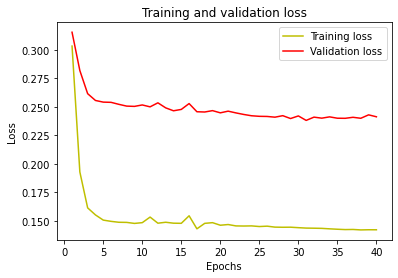

Configuration: timesteps=5, epochs=40, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.3445710241794586
mae: 0.2841190993785858
rmse: 0.3615758717060089
Epoch 1/30
24/24 [==============================] - 1s 11ms/step - loss: 0.4397 - mae: 0.4119 - rmse: 0.4392 - val_loss: 0.3163 - val_mae: 0.2814 - val_rmse: 0.3303
Epoch 2/30
24/24 [==============================] - 0s 5ms/step - loss: 0.2380 - mae: 0.2034 - rmse: 0.2377 - val_loss: 0.2612 - val_mae: 0.2334 - val_rmse: 0.2728
Epoch 3/30
24/24 [==============================] - 0s 4ms/step - loss: 0.1589 - mae: 0.1263 - rmse: 0.1588 - val_loss: 0.2629 - val_mae: 0.2354 - val_rmse: 0.2741
Epoch 4/30
24/24 [==============================] - 0s 4ms/step - loss: 0.1559 - mae: 0.1294 - rmse: 0.1558 - val_loss: 0.2590 - val_mae: 0.2322 - val_rmse: 0.2696
Epoch 5/30
24/24 [==============================] - 0s 4ms/step - loss: 0.1471 - mae: 0.1145 - rmse: 0.1470 - val_loss: 0.2512 - val_mae: 0.2242 - val_rmse: 0.2611
Epoch 6/30
24

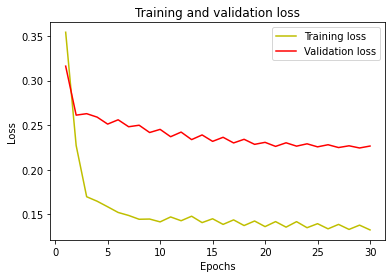

Configuration: timesteps=5, epochs=30, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.30413493514060974
mae: 0.25135815143585205
rmse: 0.3162749707698822
Epoch 1/30
34/34 [==============================] - 1s 17ms/step - loss: 0.3963 - mae: 0.3710 - rmse: 0.3961 - val_loss: 0.2679 - val_mae: 0.2498 - val_rmse: 0.2786
Epoch 2/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1998 - mae: 0.1658 - rmse: 0.1998 - val_loss: 0.2587 - val_mae: 0.2433 - val_rmse: 0.2681
Epoch 3/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1607 - mae: 0.1366 - rmse: 0.1607 - val_loss: 0.2594 - val_mae: 0.2446 - val_rmse: 0.2680
Epoch 4/30
34/34 [==============================] - 0s 3ms/step - loss: 0.1460 - mae: 0.1200 - rmse: 0.1460 - val_loss: 0.2590 - val_mae: 0.2443 - val_rmse: 0.2667
Epoch 5/30
34/34 [==============================] - 0s 4ms/step - loss: 0.1479 - mae: 0.1219 - rmse: 0.1478 - val_loss: 0.2447 - val_mae: 0.2301 - val_rmse: 0.2517
Epoch 6/30

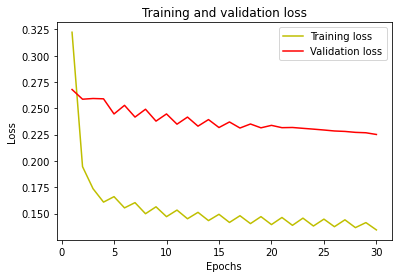

Configuration: timesteps=5, epochs=30, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.30608105659484863
mae: 0.25481536984443665
rmse: 0.3182848393917084
Epoch 1/30
47/47 [==============================] - 1s 7ms/step - loss: 0.4407 - mae: 0.4160 - rmse: 0.4406 - val_loss: 0.2763 - val_mae: 0.2582 - val_rmse: 0.2763
Epoch 2/30
47/47 [==============================] - 0s 3ms/step - loss: 0.2114 - mae: 0.1859 - rmse: 0.2113 - val_loss: 0.2671 - val_mae: 0.2516 - val_rmse: 0.2671
Epoch 3/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1572 - mae: 0.1330 - rmse: 0.1572 - val_loss: 0.2855 - val_mae: 0.2655 - val_rmse: 0.2855
Epoch 4/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1516 - mae: 0.1267 - rmse: 0.1516 - val_loss: 0.2485 - val_mae: 0.2350 - val_rmse: 0.2485
Epoch 5/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1402 - mae: 0.1136 - rmse: 0.1402 - val_loss: 0.2643 - val_mae: 0.2489 - val_rmse: 0.2643
Epoch 6/30
4

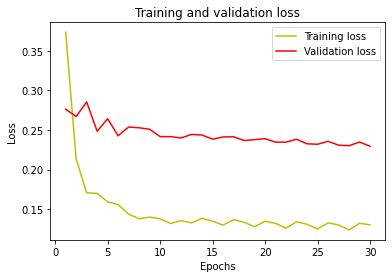

Configuration: timesteps=5, epochs=30, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3117638826370239
mae: 0.24798624217510223
rmse: 0.3254116475582123
Epoch 1/30
117/117 [==============================] - 1s 3ms/step - loss: 0.2333 - mae: 0.2093 - rmse: 0.2333 - val_loss: 0.3668 - val_mae: 0.3217 - val_rmse: 0.3722
Epoch 2/30
117/117 [==============================] - 0s 2ms/step - loss: 0.1921 - mae: 0.1664 - rmse: 0.1921 - val_loss: 0.3475 - val_mae: 0.3063 - val_rmse: 0.3523
Epoch 3/30
117/117 [==============================] - 0s 2ms/step - loss: 0.1671 - mae: 0.1428 - rmse: 0.1671 - val_loss: 0.3490 - val_mae: 0.3069 - val_rmse: 0.3531
Epoch 4/30
117/117 [==============================] - 0s 2ms/step - loss: 0.1652 - mae: 0.1429 - rmse: 0.1652 - val_loss: 0.3478 - val_mae: 0.3056 - val_rmse: 0.3513
Epoch 5/30
117/117 [==============================] - 0s 2ms/step - loss: 0.1552 - mae: 0.1341 - rmse: 0.1552 - val_loss: 0.3441 - val_mae: 0.3031 - val_rmse: 0.3479
Epo

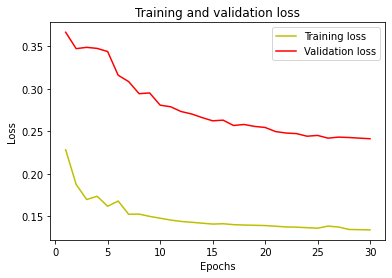

Configuration: timesteps=5, epochs=30, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.3343528211116791
mae: 0.27392569184303284
rmse: 0.3492520749568939
Epoch 1/20
24/24 [==============================] - 1s 11ms/step - loss: 0.4506 - mae: 0.4317 - rmse: 0.4501 - val_loss: 0.3083 - val_mae: 0.2785 - val_rmse: 0.3198
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: 0.2148 - mae: 0.1879 - rmse: 0.2146 - val_loss: 0.2389 - val_mae: 0.2210 - val_rmse: 0.2485
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.1507 - mae: 0.1281 - rmse: 0.1506 - val_loss: 0.2448 - val_mae: 0.2261 - val_rmse: 0.2543
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.1285 - mae: 0.1035 - rmse: 0.1285 - val_loss: 0.2412 - val_mae: 0.2212 - val_rmse: 0.2498
Epoch 5/20
24/24 [==============================] - 0s 4ms/step - loss: 0.1257 - mae: 0.1009 - rmse: 0.1257 - val_loss: 0.2352 - val_mae: 0.2118 - val_rmse: 0.2429
Epoch 6/20
2

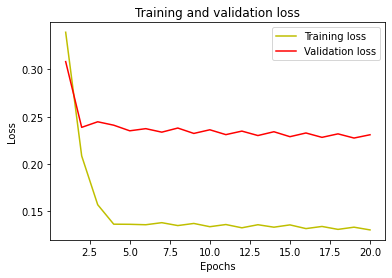

Configuration: timesteps=5, epochs=20, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3098262548446655
mae: 0.2515812814235687
rmse: 0.3232162296772003
Epoch 1/20
34/34 [==============================] - 1s 9ms/step - loss: 0.3272 - mae: 0.2993 - rmse: 0.3270 - val_loss: 0.3086 - val_mae: 0.2778 - val_rmse: 0.3209
Epoch 2/20
34/34 [==============================] - 0s 4ms/step - loss: 0.1787 - mae: 0.1493 - rmse: 0.1786 - val_loss: 0.2797 - val_mae: 0.2563 - val_rmse: 0.2889
Epoch 3/20
34/34 [==============================] - 0s 3ms/step - loss: 0.1505 - mae: 0.1199 - rmse: 0.1505 - val_loss: 0.2582 - val_mae: 0.2378 - val_rmse: 0.2657
Epoch 4/20
34/34 [==============================] - 0s 3ms/step - loss: 0.1528 - mae: 0.1222 - rmse: 0.1527 - val_loss: 0.2431 - val_mae: 0.2198 - val_rmse: 0.2497
Epoch 5/20
34/34 [==============================] - 0s 3ms/step - loss: 0.1480 - mae: 0.1194 - rmse: 0.1480 - val_loss: 0.2421 - val_mae: 0.2212 - val_rmse: 0.2486
Epoch 6/20
34

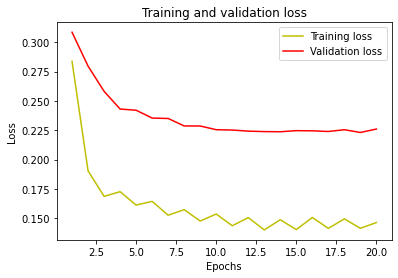

Configuration: timesteps=5, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3152158856391907
mae: 0.25144290924072266
rmse: 0.3291113078594208
Epoch 1/20
47/47 [==============================] - 1s 6ms/step - loss: 0.3280 - mae: 0.2994 - rmse: 0.3280 - val_loss: 0.2730 - val_mae: 0.2466 - val_rmse: 0.2730
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 0.1611 - mae: 0.1343 - rmse: 0.1610 - val_loss: 0.2562 - val_mae: 0.2330 - val_rmse: 0.2562
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 0.1606 - mae: 0.1333 - rmse: 0.1606 - val_loss: 0.2643 - val_mae: 0.2430 - val_rmse: 0.2643
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 0.1479 - mae: 0.1216 - rmse: 0.1479 - val_loss: 0.2497 - val_mae: 0.2300 - val_rmse: 0.2497
Epoch 5/20
47/47 [==============================] - 0s 3ms/step - loss: 0.1540 - mae: 0.1296 - rmse: 0.1540 - val_loss: 0.2429 - val_mae: 0.2247 - val_rmse: 0.2429
Epoch 6/20
47

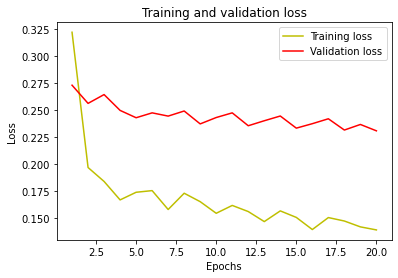

Configuration: timesteps=5, epochs=20, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3145526051521301
mae: 0.24861858785152435
rmse: 0.3282942473888397
Epoch 1/20
117/117 [==============================] - 1s 6ms/step - loss: 0.3328 - mae: 0.3093 - rmse: 0.3328 - val_loss: 0.3911 - val_mae: 0.3436 - val_rmse: 0.3991
Epoch 2/20
117/117 [==============================] - 0s 2ms/step - loss: 0.2242 - mae: 0.2001 - rmse: 0.2242 - val_loss: 0.3275 - val_mae: 0.2933 - val_rmse: 0.3335
Epoch 3/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1536 - mae: 0.1333 - rmse: 0.1536 - val_loss: 0.3219 - val_mae: 0.2879 - val_rmse: 0.3265
Epoch 4/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1394 - mae: 0.1186 - rmse: 0.1394 - val_loss: 0.3195 - val_mae: 0.2863 - val_rmse: 0.3237
Epoch 5/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1505 - mae: 0.1284 - rmse: 0.1505 - val_loss: 0.3090 - val_mae: 0.2791 - val_rmse: 0.3130
Epo

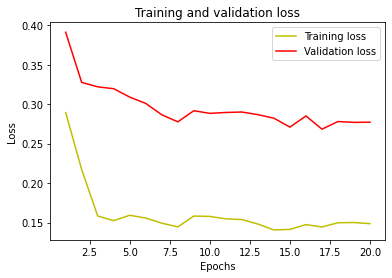

Configuration: timesteps=5, epochs=20, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.38221225142478943
mae: 0.3109973967075348
rmse: 0.3974243104457855
Epoch 1/15
24/24 [==============================] - 1s 11ms/step - loss: 0.6310 - mae: 0.6132 - rmse: 0.6304 - val_loss: 0.2425 - val_mae: 0.1911 - val_rmse: 0.2476
Epoch 2/15
24/24 [==============================] - 0s 4ms/step - loss: 0.1762 - mae: 0.1442 - rmse: 0.1760 - val_loss: 0.3070 - val_mae: 0.2766 - val_rmse: 0.3183
Epoch 3/15
24/24 [==============================] - 0s 4ms/step - loss: 0.1852 - mae: 0.1572 - rmse: 0.1851 - val_loss: 0.2574 - val_mae: 0.2363 - val_rmse: 0.2673
Epoch 4/15
24/24 [==============================] - 0s 4ms/step - loss: 0.1514 - mae: 0.1260 - rmse: 0.1513 - val_loss: 0.2746 - val_mae: 0.2525 - val_rmse: 0.2847
Epoch 5/15
24/24 [==============================] - 0s 5ms/step - loss: 0.1501 - mae: 0.1250 - rmse: 0.1500 - val_loss: 0.2649 - val_mae: 0.2452 - val_rmse: 0.2746
Epoch 6/15
2

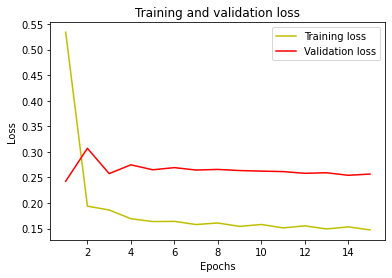

Configuration: timesteps=5, epochs=15, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.34515517950057983
mae: 0.2784736156463623
rmse: 0.35979700088500977
Epoch 1/15
34/34 [==============================] - 1s 8ms/step - loss: 0.8105 - mae: 0.7935 - rmse: 0.8101 - val_loss: 0.2440 - val_mae: 0.1981 - val_rmse: 0.2454
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.2251 - mae: 0.1932 - rmse: 0.2250 - val_loss: 0.2533 - val_mae: 0.2211 - val_rmse: 0.2559
Epoch 3/15
34/34 [==============================] - 0s 4ms/step - loss: 0.1770 - mae: 0.1445 - rmse: 0.1769 - val_loss: 0.2556 - val_mae: 0.2249 - val_rmse: 0.2586
Epoch 4/15
34/34 [==============================] - 0s 4ms/step - loss: 0.1531 - mae: 0.1236 - rmse: 0.1530 - val_loss: 0.2477 - val_mae: 0.2160 - val_rmse: 0.2508
Epoch 5/15
34/34 [==============================] - 0s 4ms/step - loss: 0.1464 - mae: 0.1175 - rmse: 0.1464 - val_loss: 0.2423 - val_mae: 0.2056 - val_rmse: 0.2449
Epoch 6/15


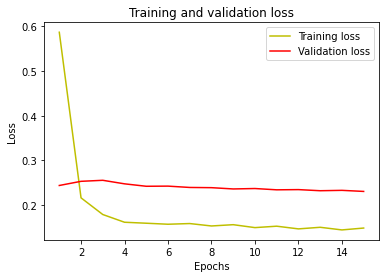

Configuration: timesteps=5, epochs=15, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.30793437361717224
mae: 0.2489059567451477
rmse: 0.3197563886642456
Epoch 1/15
47/47 [==============================] - 1s 6ms/step - loss: 0.4999 - mae: 0.4719 - rmse: 0.4998 - val_loss: 0.2780 - val_mae: 0.2557 - val_rmse: 0.2780
Epoch 2/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1755 - mae: 0.1450 - rmse: 0.1755 - val_loss: 0.2528 - val_mae: 0.2324 - val_rmse: 0.2528
Epoch 3/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1628 - mae: 0.1319 - rmse: 0.1628 - val_loss: 0.2555 - val_mae: 0.2350 - val_rmse: 0.2555
Epoch 4/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1497 - mae: 0.1207 - rmse: 0.1497 - val_loss: 0.2389 - val_mae: 0.2164 - val_rmse: 0.2389
Epoch 5/15
47/47 [==============================] - 0s 3ms/step - loss: 0.1474 - mae: 0.1170 - rmse: 0.1474 - val_loss: 0.2438 - val_mae: 0.2227 - val_rmse: 0.2438
Epoch 6/15
47

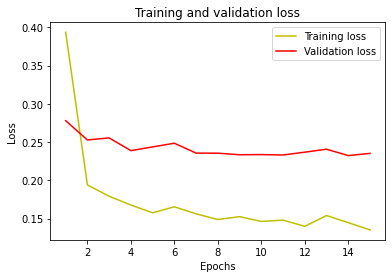

Configuration: timesteps=5, epochs=15, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3170262575149536
mae: 0.25073862075805664
rmse: 0.3307255208492279
Epoch 1/15
117/117 [==============================] - 1s 4ms/step - loss: 0.1591 - mae: 0.1338 - rmse: 0.1591 - val_loss: 0.2823 - val_mae: 0.2549 - val_rmse: 0.2845
Epoch 2/15
117/117 [==============================] - 0s 2ms/step - loss: 0.1654 - mae: 0.1433 - rmse: 0.1654 - val_loss: 0.2743 - val_mae: 0.2513 - val_rmse: 0.2764
Epoch 3/15
117/117 [==============================] - 0s 2ms/step - loss: 0.1387 - mae: 0.1145 - rmse: 0.1387 - val_loss: 0.2950 - val_mae: 0.2682 - val_rmse: 0.2975
Epoch 4/15
117/117 [==============================] - 0s 2ms/step - loss: 0.1590 - mae: 0.1368 - rmse: 0.1590 - val_loss: 0.3094 - val_mae: 0.2795 - val_rmse: 0.3124
Epoch 5/15
117/117 [==============================] - 0s 2ms/step - loss: 0.1450 - mae: 0.1243 - rmse: 0.1451 - val_loss: 0.3154 - val_mae: 0.2843 - val_rmse: 0.3188
Epo

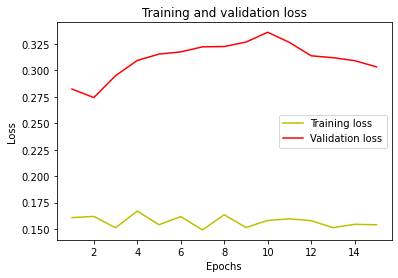

Configuration: timesteps=5, epochs=15, batch_size=2, filters=16, kernel_size=5, pool_size=2
loss: 0.3886795938014984
mae: 0.3145357072353363
rmse: 0.4041961431503296


In [12]:
scores = grid_search(df_multi, method, missing_method, configs, features)

## Forecasting

Import methods

In [13]:
from Data.data_processing import data_denormalization
from models import call_model, forecast_single_multi, forecast_multi, plot_forecast

Get trained model from a config

Epoch 1/15
24/24 [==============================] - 1s 11ms/step - loss: 0.3567 - mae: 0.3129 - rmse: 0.3562 - val_loss: 0.2919 - val_mae: 0.2621 - val_rmse: 0.3001
Epoch 2/15
24/24 [==============================] - 0s 3ms/step - loss: 0.2717 - mae: 0.2341 - rmse: 0.2715 - val_loss: 0.2949 - val_mae: 0.2658 - val_rmse: 0.3046
Epoch 3/15
24/24 [==============================] - 0s 4ms/step - loss: 0.1691 - mae: 0.1375 - rmse: 0.1690 - val_loss: 0.2789 - val_mae: 0.2530 - val_rmse: 0.2869
Epoch 4/15
24/24 [==============================] - 0s 3ms/step - loss: 0.1735 - mae: 0.1447 - rmse: 0.1734 - val_loss: 0.2682 - val_mae: 0.2443 - val_rmse: 0.2741
Epoch 5/15
24/24 [==============================] - 0s 3ms/step - loss: 0.1579 - mae: 0.1258 - rmse: 0.1579 - val_loss: 0.2550 - val_mae: 0.2299 - val_rmse: 0.2607
Epoch 6/15
24/24 [==============================] - 0s 3ms/step - loss: 0.1572 - mae: 0.1289 - rmse: 0.1572 - val_loss: 0.2530 - val_mae: 0.2302 - val_rmse: 0.2582
Epoch 7/15
24/2

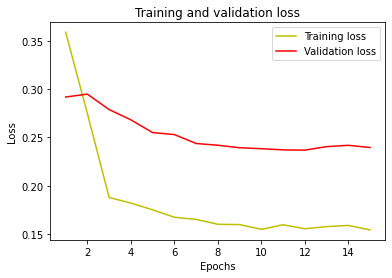

Configuration: timesteps=7, epochs=15, batch_size=10, filters=16, kernel_size=5, pool_size=2
loss: 0.3304174840450287
mae: 0.2715122103691101
rmse: 0.34518542885780334


In [14]:
my_config = (7, 15, 10, 16, 5, 2)
model = call_model(df_multi, my_config, features)[0]

Single-step forecast

In [15]:
forecast_single_multi(model, df_multi, my_config[0], features, scaler)

191.90425